In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import HDBSCAN, OPTICS
from sklearn.linear_model import RANSACRegressor

In [2]:
np.random.seed(12345)

In [3]:
def dataset(n=3, m=10, slope=(2, 3), intercept=(4, 7), sigma=0.1):
    x = np.linspace(0, 1, m)
    a = np.linspace(*slope, n)
    b = np.linspace(*intercept, n)
    xs = []
    ys = []
    for i in range(n):
        xs.extend(x)
        ys.extend(a[i] * x + b[i] + sigma * np.random.normal(size=x.size))
    X = np.stack([np.array(xs), np.array(ys)]).T
    return X

In [4]:
n = 3
X = dataset(n=n)

In [5]:
cluster = HDBSCAN(min_cluster_size=5, min_samples=3, cluster_selection_epsilon=0.15)
cluster.fit(X)

HDBSCAN(cluster_selection_epsilon=0.15, min_samples=3)

In [6]:
cluster.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1,  2,  2,  2,  2,  2,  2,  2, -1])

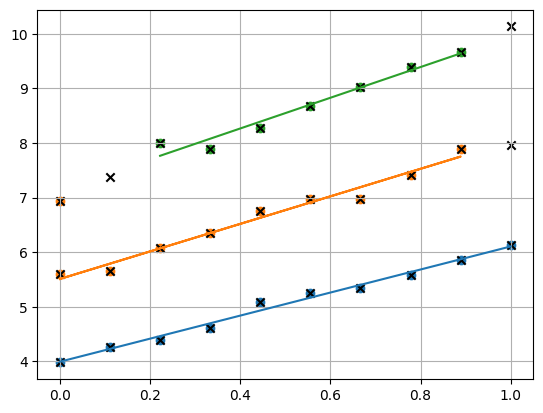

In [15]:
fig, axe = plt.subplots()
errors = []
for i in range(n):
    q = cluster.labels_ == i
    x = X[q, 0].reshape(-1, 1)
    y = X[q, 1]
    regressor = RANSACRegressor()
    regressor.fit(x, y)
    errors.append(X[:, 1] - regressor.predict(X[:,0].reshape(-1, 1)))
    axe.scatter(x, y, marker="o")
    axe.plot(x, regressor.predict(x))
axe.scatter(X[:, 0], X[:, 1], marker="x", color="black")
axe.grid()

In [20]:
E = np.array(errors).T
E

array([[-0.01412632, -1.52974767, -3.16075598],
       [ 0.04183254, -1.51947936, -3.18287945],
       [-0.07041191, -1.67741435, -3.37320623],
       [-0.08644731, -1.73914029, -3.46732396],
       [ 0.15329753, -1.54508599, -3.30566144],
       [ 0.08365382, -1.66042025, -3.45338749],
       [-0.05880222, -1.84856683, -3.67392586],
       [-0.05232464, -1.88777979, -3.7455306 ],
       [-0.01600324, -1.89714894, -3.78729153],
       [ 0.01933174, -1.9075045 , -3.83003889],
       [ 1.60706338,  0.09144203, -1.53956628],
       [ 1.41987165, -0.14144025, -1.80484034],
       [ 1.62014224,  0.0131398 , -1.68265208],
       [ 1.65868367,  0.00599069, -1.72219297],
       [ 1.81423338,  0.11584986, -1.6447256 ],
       [ 1.81073395,  0.06665988, -1.72630736],
       [ 1.56507659, -0.22468802, -2.05004704],
       [ 1.77120538, -0.06424977, -1.92200058],
       [ 2.01844148,  0.13729578, -1.75284682],
       [ 1.85083129, -0.07600495, -1.99853934],
       [ 2.9523703 ,  1.43674895, -0.194

In [21]:
cluster2 = HDBSCAN(min_cluster_size=5, min_samples=3, cluster_selection_epsilon=0.15)
cluster2.fit(E)

HDBSCAN(cluster_selection_epsilon=0.15, min_samples=3)

In [23]:
cluster2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])